# <b>Deep learning to classify American Sign Language (ASL)

## <b>Our problem

We have a data set that is split into 29 classes for 29 signs representing the 26 letters of alphabet in addition to space, delete, and nothing signs. Our goal is to make a model that would be able to handle images of different hands and backgrounds. 
Our goal is to have a model that would achieve an accuracy of more than 95%.

## <b>First we import neccessary libraries

In [60]:
import os
import cv2
import numpy as np
from time import time
import tensorflow as tf
import pandas as pd
import PIL 
from PIL import Image
import keras
from keras.callbacks import EarlyStopping
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

## <b>Here's a representation to give you an idea of how our data look like

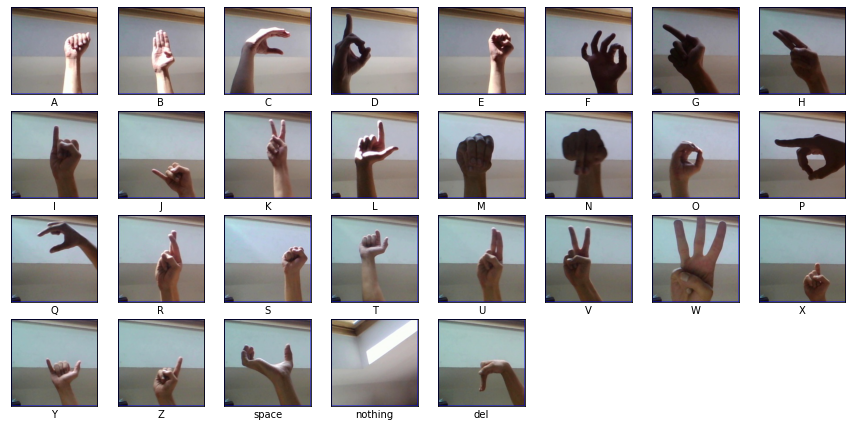

In [4]:
from to_import import visualize
train_dir = '../asl_alphabet_train/asl_alphabet_train'
test_dir = '../asl_alphabet_test/asl_alphabet_test'
visualize(train_dir)

## <b>Now we extract our data<b>

In [82]:
from to_import import loadData

x_train, x_test, y_train, y_test = loadData(train_dir)

Loaded 21224 images for training, Train data shape = (21224, 64, 64, 3)
Loaded 2359 images for testing Test data shape = (2359, 64, 64, 3)


## <b>Here we build our model from scratch<b>

Since this task is somewhat similar to that of project 5, we decided to start with our scratch model from project 5 and do some hyperparameter tuning to get the best model.

In [163]:
from to_import import modelArch
model = modelArch()
rms = keras.optimizers.RMSprop(lr=8E-4)
model.compile(optimizer = rms , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_290 (Conv2D)          (None, 64, 64, 16)        448       
_________________________________________________________________
batch_normalization_290 (Bat (None, 64, 64, 16)        64        
_________________________________________________________________
max_pooling2d_290 (MaxPoolin (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_291 (Conv2D)          (None, 32, 32, 16)        2320      
_________________________________________________________________
batch_normalization_291 (Bat (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d_291 (MaxPoolin (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_292 (Conv2D)          (None, 16, 16, 32)      

In [127]:
history = model.fit(x_train, y_train, batch_size=32, epochs=11, validation_split=0.1, shuffle = True, verbose=0)

## <b>The results of our model<b>

The following section shows the result of our model and 2 graphs to show the change of the loss and accuracy over time

In [128]:
from to_import import accuracy, lossPlotter, accPlotter
import pylab as py
predictions = (model.predict(x_test) > 0.5).astype("int32")
accuracy(y_test, predictions)


97.45654938533276 %


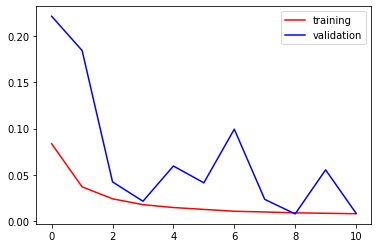

In [129]:
lossPlotter(history)

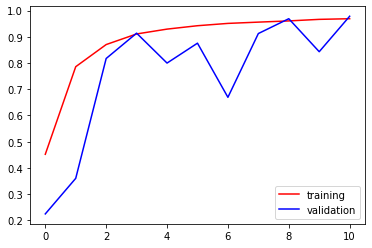

In [130]:
accPlotter(history)

## <b>The following section explains the choice of our parameters<b>

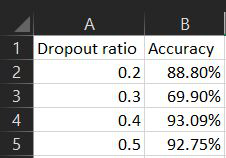

In [131]:
tuning = Image.open("Dropout.JPG")
tuning


This suggests that 0.4 is the best dropout ratio

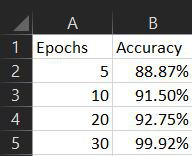

In [132]:
epochs = Image.open("epochs.JPG")
epochs

That would suggest that <b>30</b> epochs is the best; however, since we have a graph of the loss overtime, its clear that after the <b>12th</b> epoch there's a lot of overfitting happening which means that <b>12</b> epochs would best suit our model more. The following graph shows that.

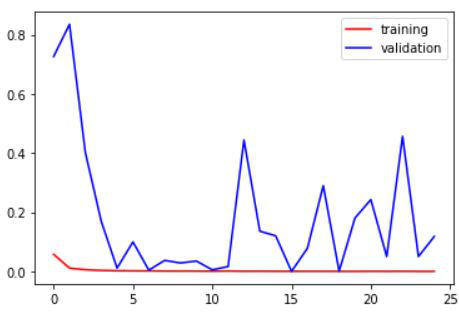

In [133]:
graph = Image.open("graph.JPG")
graph

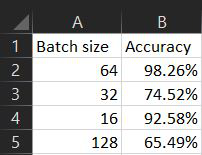

In [134]:
batch = Image.open("batch.JPG")
batch

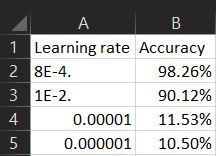

In [135]:
lr = Image.open("lr.JPG")
lr

So far we are getting a really good accuracy ranging from 88% to 98.5% with differnet parameters; however, we have an issure of overfitting that we can tell from the loss graph; this issue will lead to a lot less accuracy if we try our model on different data set than the one that we have. We are going to solve this issue in the next section.

# <b> Resolving overfitting

## <b> Earlystopping

So far we have noticed that no matter how accurate our model is, there's always a problem of overfitting that we can tell from the loss graph. This means that with a real life data set our model will be much less accurate. 
That being said, the accuracy that we have doesn't necessarily mean that our model is working well. We used 2 tecnhiques to resolve that issue; earlystopping and data augmentation.

In [164]:
es = EarlyStopping(monitor ='val_loss', min_delta=0.001, patience=50)
history = model.fit(x_train, y_train, batch_size=32, epochs=11, validation_split=0.1, shuffle = True, callbacks = [es], verbose=0)

In [165]:
predictions = (model.predict(x_test) > 0.5).astype("int32")
accuracy(y_test, predictions)

96.48155998304367 %


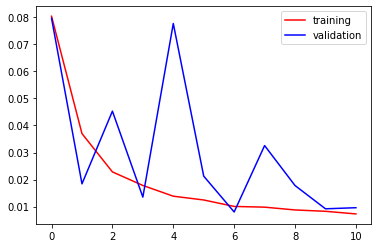

In [166]:
lossPlotter(history)

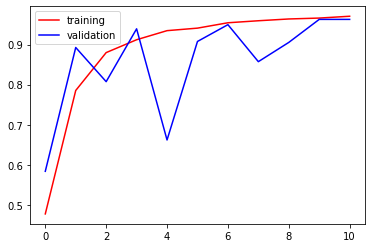

In [167]:
accPlotter(history)

## <b>Data Augmentation</b>

Early stopping didn't seem to really help with our issue, so we tried one more technique to overcome this problem which is data augmentation. Data augmentation will help us have much more data to train with and accordingly make our model adapt to different data set and have less overfitting.

### Augmentation we try:

* Horizontal flip
* Vertical flip
* Rotation
* Width shift
* Height shift

In [148]:
datagen = ImageDataGenerator(
    rotation_range=45, 
    width_shift_range=0.2,
    height_shift_range=0.2, 
    horizontal_flip=True,
    vertical_flip=False)
datagen.fit(x_train)


In [150]:
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.1, shuffle = True, verbose=0)

In [151]:
predictions = (model.predict(x_test) > 0.5).astype("int32")
accuracy(y_test, predictions)


98.34675710046629 %


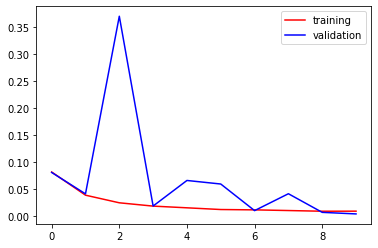

In [152]:
lossPlotter(history)

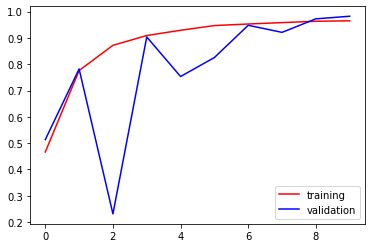

In [153]:
accPlotter(history)

### <b> Explaining our data augmentation parameters choices

* Rotation range: It makes sense that we don't need the image to be rotated by more than 45 deegree. In any data set it makes sense that the photo will be taken upright and there might be a little rotation to the right or the left, but there's no way that somebody will rotate their hand 90 degree while making a sign language.
    
* Horizontal flip: Since not everybody's dominant hand is right, a lot of different dataset might include left-handed sign language which would be the same thing but horizontally flipped. That's why we had our horizontal flip set as true to make sure that our model will work on left-handed people.

* Vertical flip: It doesn't make sense that anybody would flip their hand upside down before they do a sign and that's why we set that to  false.

* Width and height shift range: Different backgrounds and environments might lead to a shift in the width and height so we set that to be 0.2 to make sure it's not too big so we don't lose anything from the sign.


## <b> Concluding our scratch model
    
As we can see from the hyperparameters tuning, data augmentation, and different things that we have tried so far, some parameters got us really high accuracies but with a big problem of over fitting, which implies that we needed more data set to resolve that problem or different dataset would get much less accuracy. In this project we used data augmentation which seems to really help meaning that our model would still work on different dataset with a really good accuracy.